In [1]:
import pandas as pd
import numpy as np
import os
import glob
import rdkit

In [2]:
df = pd.read_csv('Outcome Matrix_updated.csv')
df.columns

Index(['Unnamed: 0', 'SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-ahr-p1',
       'tox21-ap1-agonist-p1', 'tox21-ar-bla-antagonist-p1',
       'tox21-ar-mda-kb2-luc-agonist-p3', 'tox21-ar-mda-kb2-luc-antagonist-p1',
       'tox21-ar-mda-kb2-luc-antagonist-p2', 'tox21-are-bla-p1',
       'tox21-aromatase-p1', 'tox21-car-agonist-p1', 'tox21-car-antagonist-p1',
       'tox21-casp3-cho-p1', 'tox21-casp3-hepg2-p1',
       'tox21-elg1-luc-agonist-p1', 'tox21-er-bla-antagonist-p1',
       'tox21-er-luc-bg1-4e2-agonist-p4', 'tox21-er-luc-bg1-4e2-antagonist-p1',
       'tox21-er-luc-bg1-4e2-antagonist-p2', 'tox21-erb-bla-antagonist-p1',
       'tox21-erb-bla-p1', 'tox21-err-p1', 'tox21-esre-bla-p1',
       'tox21-fxr-bla-agonist-p2', 'tox21-fxr-bla-antagonist-p1',
       'tox21-gh3-tre-antagonist-p1', 'tox21-gr-hela-bla-antagonist-p1',
       'tox21-h2ax-cho-p2', 'tox21-hdac-p1', 'tox21-hre-bla-agonist-p1',
       'tox21-hse-bla-p1', 'tox21-mitotox-p1', 'tox21-nfkb-bla-agonist-p1',
       'to

In [3]:
ahr_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-ahr-p1', 'SMILES']].dropna(subset=['tox21-ahr-p1']).reset_index()
ahr_p1

,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,SMILES
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC
...,...,...,...,...,...,...
9839,13122,NCGC00016575-01,ZJIWRHLZXQPFAD-UIVINLTNSA-N,Colistin sulfate,0.0,O=S(=O)(O)O.C[C@@H](CC)CCCCC(=O)N[C@@H](CCN)C(...
9840,13123,NCGC00016403-01,SIACJRVYIPXFKS-UHFFFAOYSA-N,Mafenide hydrochloride,0.0,Cl.O=S(N)(=O)c1ccc(CN)cc1
9841,13124,NCGC00016662-01,MKFFGUZYVNDHIH-UHFFFAOYSA-N,Orciprenaline sulfate,0.0,Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...
9842,13126,NCGC00022248-03,HHZQLQREDATOBM-CODXZCKSSA-M,Hydrocortisone 21-hemisuccinate sodium salt,0.0,[Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...


In [4]:
ahr_p1.head(60)

,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,SMILES
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC
5,5,NCGC00254400-01,DDXLVDQZPFLQMZ-UHFFFAOYSA-M,Dodecyltrimethylammonium chloride,0.0,[Cl-].C[N+](C)(C)CCCCCCCCCCCC
6,6,NCGC00254378-01,CNIGFESSDPOCKS-CYBMUJFWSA-N,CP-671305,0.0,O=C(O)[C@@H](C)Oc4ccc(CNC(=O)c3cccnc3Oc1ccc2OC...
7,7,NCGC00254463-01,VKYKSIONXSXAKP-UHFFFAOYSA-N,Methenamine,0.0,C1N3CN2CN(CN1C2)C3
8,8,NCGC00254588-01,XERJKGMBORTKEO-VZUCSPMQSA-N,Cymoxanil,0.0,N#C/C(=N\OC)C(=O)NC(=O)NCC
9,9,NCGC00254764-01,DOFZAZXDOSGAJZ-UHFFFAOYSA-N,Disulfoton,0.0,CCSCCSP(=S)(OCC)OCC


In [5]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import IPythonConsole

In [6]:
AZmol_list = []
for i in range (len(ahr_p1)):
    try:
        AZmol_lis = Chem.MolFromSmiles(ahr_p1['SMILES'][i])
#         AZ_IK_list = [Chem.MolToInchiKey(AZmol) for AZmol in AZmol_list]
        print(AZmol_lis)
        AZmol_list.append(AZmol_lis)
    except:
        print(ahr_p1['SMILES'][i])
        AZmol_list.append('')

nan
nan
nan
nan


nan
nan
nan
nan
nan


nan
nan
nan


nan
nan


nan
None
nan
None
nan


nan
nan
nan
nan


nan
nan
nan
None
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
None
nan
nan


nan
nan
nan
nan


nan
nan
nan
nan


nan
nan
nan
nan
None
None
None
nan
nan
nan


nan
nan
None
nan
None
nan


nan
nan
nan


nan
nan


nan


nan
nan
nan
None
nan


None
nan
nan
nan
nan
nan
nan


nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan


nan
nan
nan


nan
nan
nan
nan
nan
nan
nan


nan
None
nan


nan
nan


nan
nan
nan
nan
nan
nan
nan


nan
None


nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan


nan
nan


None
nan
nan


None
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan


nan
nan
nan
nan


nan
nan
nan


nan


In [7]:
AZmol_list.isna().sum()

AttributeError: 'list' object has no attribute 'isna'

In [8]:
def generate_descriptor_value(smiles, descriptor_function):
    mol = Chem.MolFromSmiles(smiles)
    value = None
    if mol is not None:
        value = descriptor_function(mol)
    return value

In [18]:
df_all = ahr_p1.copy()

for (descriptor_tuple, i) in zip(Descriptors.descList, range(len(df_all))):
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
#     df_all[descriptor_name] = df_all['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
    try:
        df_all[descriptor_name] = df_all['SMILES'][i].apply(lambda x: generate_descriptor_value(x, descriptor_function))
#         print(i)
    except:
        print('NaN')

df_all

NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,SMILES
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC
...,...,...,...,...,...,...
9839,13122,NCGC00016575-01,ZJIWRHLZXQPFAD-UIVINLTNSA-N,Colistin sulfate,0.0,O=S(=O)(O)O.C[C@@H](CC)CCCCC(=O)N[C@@H](CCN)C(...
9840,13123,NCGC00016403-01,SIACJRVYIPXFKS-UHFFFAOYSA-N,Mafenide hydrochloride,0.0,Cl.O=S(N)(=O)c1ccc(CN)cc1
9841,13124,NCGC00016662-01,MKFFGUZYVNDHIH-UHFFFAOYSA-N,Orciprenaline sulfate,0.0,Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...
9842,13126,NCGC00022248-03,HHZQLQREDATOBM-CODXZCKSSA-M,Hydrocortisone 21-hemisuccinate sodium salt,0.0,[Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...


In [19]:
descriptor_name = descriptor_tuple[0]
descriptor_function = descriptor_tuple[1]
generate_descriptor_value(df_all['SMILES'][0], descriptor_function)

0

In [20]:
smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

9684
160
9684


In [21]:
df_all2 = df_all.iloc[widx, :]
df_all2

,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,SMILES
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC
...,...,...,...,...,...,...
9839,13122,NCGC00016575-01,ZJIWRHLZXQPFAD-UIVINLTNSA-N,Colistin sulfate,0.0,O=S(=O)(O)O.C[C@@H](CC)CCCCC(=O)N[C@@H](CCN)C(...
9840,13123,NCGC00016403-01,SIACJRVYIPXFKS-UHFFFAOYSA-N,Mafenide hydrochloride,0.0,Cl.O=S(N)(=O)c1ccc(CN)cc1
9841,13124,NCGC00016662-01,MKFFGUZYVNDHIH-UHFFFAOYSA-N,Orciprenaline sulfate,0.0,Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...
9842,13126,NCGC00022248-03,HHZQLQREDATOBM-CODXZCKSSA-M,Hydrocortisone 21-hemisuccinate sodium salt,0.0,[Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...


In [22]:
for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    df_all2[descriptor_name] = df_all2['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

df_all2

C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/3392396073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all2[descriptor_name] = df_all2['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/3392396073.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all2[descriptor_name] = df_all2['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,13122,NCGC00016575-01,ZJIWRHLZXQPFAD-UIVINLTNSA-N,Colistin sulfate,0.0,O=S(=O)(O)O.C[C@@H](CC)CCCCC(=O)N[C@@H](CCN)C(...,14.424310,-4.666667,14.424310,0.013058,...,0,0,0,0,0,0,0,0,1,0
9840,13123,NCGC00016403-01,SIACJRVYIPXFKS-UHFFFAOYSA-N,Mafenide hydrochloride,0.0,Cl.O=S(N)(=O)c1ccc(CN)cc1,10.779027,-3.568620,10.779027,0.000000,...,0,1,0,0,0,0,0,0,0,0
9841,13124,NCGC00016662-01,MKFFGUZYVNDHIH-UHFFFAOYSA-N,Orciprenaline sulfate,0.0,Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...,9.733565,-4.666667,9.733565,0.047595,...,0,0,0,0,0,0,0,0,0,0
9842,13126,NCGC00022248-03,HHZQLQREDATOBM-CODXZCKSSA-M,Hydrocortisone 21-hemisuccinate sodium salt,0.0,[Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...,13.079510,-1.724403,13.079510,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_all2.to_csv('tox21-ahr-p1.csv')

In [49]:
dfcorr = df_all2.iloc[:, 4:]
dfcorr = dfcorr.drop('SMILES', axis = 1)
dfcorr.corr()

,tox21-ahr-p1,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
tox21-ahr-p1,1.000000,0.051387,-0.073111,0.051525,-0.070735,-0.119911,0.241729,0.244615,0.241712,0.217444,...,-0.001515,-0.010542,-0.005043,-0.016656,-0.004792,-0.004653,0.023963,0.022595,0.025291,-0.010058
MaxEStateIndex,0.051387,1.000000,-0.446207,0.999928,-0.393704,-0.016328,0.433589,0.436176,0.434159,0.467132,...,0.053816,0.124626,0.059816,0.023033,0.029771,0.001575,-0.018873,-0.000936,-0.057194,0.098070
MinEStateIndex,-0.073111,-0.446207,1.000000,-0.449450,0.019109,0.183513,-0.374546,-0.388542,-0.374768,-0.338103,...,-0.005047,-0.336817,-0.127295,0.006323,-0.002367,-0.003030,0.031284,0.005506,0.043283,-0.063517
MaxAbsEStateIndex,0.051525,0.999928,-0.449450,1.000000,-0.392604,-0.016951,0.433719,0.436299,0.434290,0.467294,...,0.053713,0.124521,0.059766,0.022989,0.029735,0.001512,-0.018894,-0.000985,-0.056639,0.097974
MinAbsEStateIndex,-0.070735,-0.393704,0.019109,-0.392604,1.000000,-0.045080,-0.209882,-0.205909,-0.209846,-0.223657,...,-0.033035,-0.044587,-0.030368,-0.023833,-0.021959,-0.006766,0.016628,0.000268,0.013357,-0.017938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,-0.004653,0.001575,-0.003030,0.001512,-0.006766,-0.030152,0.082524,0.086701,0.082559,0.070166,...,0.164667,0.019784,-0.009021,-0.008652,0.068721,1.000000,0.013941,-0.002223,-0.023239,0.009221
fr_thiocyan,0.023963,-0.018873,0.031284,-0.018894,0.016628,-0.035201,-0.025230,-0.024474,-0.025209,-0.028061,...,0.137842,-0.006593,-0.003154,-0.003025,-0.002333,0.013941,1.000000,-0.003440,0.020772,-0.006133
fr_thiophene,0.022595,-0.000936,0.005506,-0.000985,0.000268,0.032055,0.051959,0.054625,0.051873,0.038656,...,0.019009,0.040337,0.004017,-0.006615,0.009736,-0.002223,-0.003440,1.000000,-0.024256,0.012923
fr_unbrch_alkane,0.025291,-0.057194,0.043283,-0.056639,0.013357,-0.308384,0.097189,0.073231,0.097405,0.148108,...,-0.005526,-0.018478,-0.012779,-0.018080,-0.009691,-0.023239,0.020772,-0.024256,1.000000,-0.037997


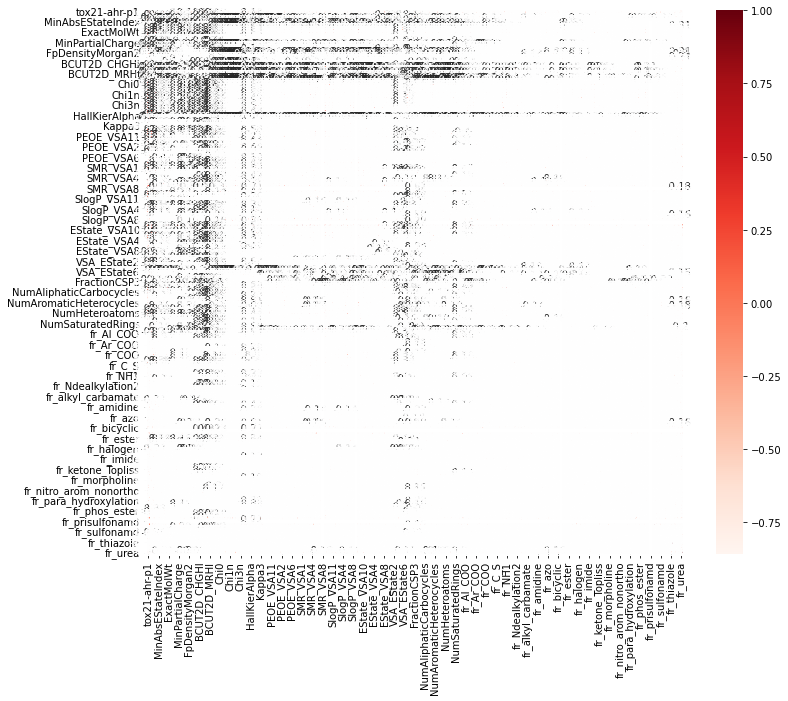

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = dfcorr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
#Correlation with output variable
cor_target = abs(cor["tox21-ahr-p1"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

tox21-ahr-p1              1.000000
MolWt                     0.241729
HeavyAtomMolWt            0.244615
ExactMolWt                0.241712
NumValenceElectrons       0.217444
BertzCT                   0.270535
Chi0                      0.220676
Chi0n                     0.222004
Chi0v                     0.241219
Chi1                      0.232921
Chi1n                     0.215104
Chi1v                     0.231017
Chi2n                     0.201249
Chi2v                     0.221236
Chi3v                     0.225299
Chi4v                     0.204757
Kappa1                    0.203365
LabuteASA                 0.243287
PEOE_VSA8                 0.216226
SMR_VSA7                  0.240456
SlogP_VSA6                0.237756
HeavyAtomCount            0.233817
NumAromaticCarbocycles    0.255516
NumAromaticRings          0.245569
RingCount                 0.222515
MolMR                     0.243694
fr_benzene                0.258757
Name: tox21-ahr-p1, dtype: float64

In [55]:
temp = cor[(cor>0.5)&(cor!=1)].abs().max()
print(temp[~temp.isna()])

MaxEStateIndex            0.999928
MaxAbsEStateIndex         0.999928
MolWt                     0.999995
HeavyAtomMolWt            0.998602
ExactMolWt                0.999995
                            ...   
fr_phenol_noOrthoHbond    0.991626
fr_phos_acid              0.874755
fr_phos_ester             0.874755
fr_sulfide                0.535748
fr_unbrch_alkane          0.623226
Length: 140, dtype: float64


### Code for generate chemical descriptor for assays

In [5]:
import pandas as pd
import numpy as np
import os
import glob
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import IPythonConsole



In [9]:
df = pd.read_csv('Outcome Matrix_updated.csv')
# df

car_agonist_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-car-agonist-p1', 'SMILES']].dropna(
    subset=['tox21-car-agonist-p1']).reset_index()
# car_agonist_p1

def generate_descriptor_value(smiles, descriptor_function):
    mol = Chem.MolFromSmiles(smiles)
    value = None
    if mol is not None:
        value = descriptor_function(mol)
    return value

df_all = car_agonist_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

df_all2 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    df_all2[descriptor_name] = df_all2['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

df_all2

9060
157
9060


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/935442973.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all2[descriptor_name] = df_all2['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/935442973.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all2[descriptor_name] = df_all2['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-car-agonist-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,13110,NCGC00357198-01,MYMSJFSOOQERIO-UHFFFAOYSA-N,1-Bromodecane,0.0,BrCCCCCCCCCC,3.443408,1.182500,3.443408,1.182500,...,0,0,0,0,0,0,0,0,6,0
9212,13111,NCGC00357238-01,SILSDTWXNBZOGF-KUZBFYBWSA-N,Clethodim,0.0,CC/C(=N\OC\C=C\Cl)C1=C(O)CC(CC(C)SCC)CC1=O,12.447525,-0.037469,12.447525,0.037469,...,1,0,0,0,0,0,0,0,1,0
9213,13112,NCGC00356949-01,JRNGUTKWMSBIBF-UHFFFAOYSA-N,"2,3-Dihydroxynaphthalene",0.0,Oc1cc2ccccc2cc1O,9.167281,-0.075278,9.167281,0.075278,...,0,0,0,0,0,0,0,0,0,0
9214,13113,NCGC00356965-01,SJJISKLXUJVZOA-ISLYRVAYSA-N,C.I. Solvent Yellow 56,1.0,CCN(CC)c1ccc(cc1)/N=N/c2ccccc2,4.235067,0.870666,4.235067,0.870666,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ar_bla_antagonist_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-ar-bla-antagonist-p1', 'SMILES']].dropna(
    subset=['tox21-ar-bla-antagonist-p1']).reset_index()

df_all = ar_bla_antagonist_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

ar_bla_antagonist_p1 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    ar_bla_antagonist_p1[descriptor_name] = ar_bla_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

ar_bla_antagonist_p1

9477
159
9477


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/3619416732.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_bla_antagonist_p1[descriptor_name] = ar_bla_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/3619416732.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ar_bla_antagonist_p1[descriptor_name] = ar_bla_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ar-bla-antagonist-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,13122,NCGC00016575-01,ZJIWRHLZXQPFAD-UIVINLTNSA-N,Colistin sulfate,0.0,O=S(=O)(O)O.C[C@@H](CC)CCCCC(=O)N[C@@H](CCN)C(...,14.424310,-4.666667,14.424310,0.013058,...,0,0,0,0,0,0,0,0,1,0
9632,13124,NCGC00016662-01,MKFFGUZYVNDHIH-UHFFFAOYSA-N,Orciprenaline sulfate,0.0,Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...,9.733565,-4.666667,9.733565,0.047595,...,0,0,0,0,0,0,0,0,0,0
9633,13125,NCGC00018255-04,ZQDWXGKKHFNSQK-UHFFFAOYSA-N,Hydroxyzine,0.0,Clc1ccc(cc1)C(c2ccccc2)N3CCN(CC3)CCOCCO,8.779094,0.090898,8.779094,0.090898,...,0,0,0,0,0,0,0,0,2,0
9634,13126,NCGC00022248-03,HHZQLQREDATOBM-CODXZCKSSA-M,Hydrocortisone 21-hemisuccinate sodium salt,0.0,[Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...,13.079510,-1.724403,13.079510,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_all2.to_csv('car_agonist_p1.csv')
ar_bla_antagonist_p1.to_csv('ar_bla_antagonist_p1.csv')

#### More feature matrices

In [25]:
ar_mda_kb2_luc_antagonist_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-ar-mda-kb2-luc-antagonist-p1', 'SMILES']].dropna(
    subset=['tox21-ar-mda-kb2-luc-antagonist-p1']).reset_index()

df_all = ar_mda_kb2_luc_antagonist_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

ar_mda_kb2_luc_antagonist_p1 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    ar_mda_kb2_luc_antagonist_p1[descriptor_name] = ar_mda_kb2_luc_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

ar_mda_kb2_luc_antagonist_p1

9902
161
9902


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/4078874689.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_mda_kb2_luc_antagonist_p1[descriptor_name] = ar_mda_kb2_luc_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/4078874689.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ar_mda_kb2_luc_antagonist_p1[descriptor_name] = ar_mda_kb2_luc_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descri

,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ar-mda-kb2-luc-antagonist-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",1.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10058,13122,NCGC00016575-01,ZJIWRHLZXQPFAD-UIVINLTNSA-N,Colistin sulfate,0.0,O=S(=O)(O)O.C[C@@H](CC)CCCCC(=O)N[C@@H](CCN)C(...,14.424310,-4.666667,14.424310,0.013058,...,0,0,0,0,0,0,0,0,1,0
10059,13123,NCGC00016403-01,SIACJRVYIPXFKS-UHFFFAOYSA-N,Mafenide hydrochloride,0.0,Cl.O=S(N)(=O)c1ccc(CN)cc1,10.779027,-3.568620,10.779027,0.000000,...,0,1,0,0,0,0,0,0,0,0
10060,13124,NCGC00016662-01,MKFFGUZYVNDHIH-UHFFFAOYSA-N,Orciprenaline sulfate,0.0,Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...,9.733565,-4.666667,9.733565,0.047595,...,0,0,0,0,0,0,0,0,0,0
10061,13126,NCGC00022248-03,HHZQLQREDATOBM-CODXZCKSSA-M,Hydrocortisone 21-hemisuccinate sodium salt,0.0,[Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...,13.079510,-1.724403,13.079510,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [26]:
ar_mda_kb2_luc_antagonist_p1. to_csv('ar_mda_kb2_luc_antagonist_p1.csv')

In [28]:
erb_bla_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-erb-bla-p1', 'SMILES']].dropna(
    subset=['tox21-erb-bla-p1']).reset_index()

df_all = erb_bla_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

erb_bla_p1 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    erb_bla_p1[descriptor_name] = erb_bla_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

erb_bla_p1

8449
151
8449


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/2938768557.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erb_bla_p1[descriptor_name] = erb_bla_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/2938768557.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  erb_bla_p1[descriptor_name] = erb_bla_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-erb-bla-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8594,13111,NCGC00357238-01,SILSDTWXNBZOGF-KUZBFYBWSA-N,Clethodim,0.0,CC/C(=N\OC\C=C\Cl)C1=C(O)CC(CC(C)SCC)CC1=O,12.447525,-0.037469,12.447525,0.037469,...,1,0,0,0,0,0,0,0,1,0
8595,13112,NCGC00356949-01,JRNGUTKWMSBIBF-UHFFFAOYSA-N,"2,3-Dihydroxynaphthalene",0.0,Oc1cc2ccccc2cc1O,9.167281,-0.075278,9.167281,0.075278,...,0,0,0,0,0,0,0,0,0,0
8596,13113,NCGC00356965-01,SJJISKLXUJVZOA-ISLYRVAYSA-N,C.I. Solvent Yellow 56,1.0,CCN(CC)c1ccc(cc1)/N=N/c2ccccc2,4.235067,0.870666,4.235067,0.870666,...,0,0,0,0,0,0,0,0,0,0
8597,13114,NCGC00357224-01,UGVRJVHOJNYEHR-UHFFFAOYSA-N,4-Chlorobenzophenone,0.0,O=C(c1ccc(Cl)cc1)c2ccccc2,11.914512,0.020617,11.914512,0.020617,...,0,0,0,0,0,0,0,0,0,0


In [29]:
esre_bla_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-esre-bla-p1', 'SMILES']].dropna(
    subset=['tox21-esre-bla-p1']).reset_index()

df_all = esre_bla_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

esre_bla_p1 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    esre_bla_p1[descriptor_name] = esre_bla_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

esre_bla_p1

8243
144
8243


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/2857165133.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esre_bla_p1[descriptor_name] = esre_bla_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/2857165133.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  esre_bla_p1[descriptor_name] = esre_bla_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-esre-bla-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,13104,NCGC00259390-01,BXNANOICGRISHX-UHFFFAOYSA-N,Coumaphos,0.0,CCOP(=S)(OCC)Oc1ccc2c(c1)OC(=O)C(Cl)=C2C,11.652882,-2.865017,11.652882,0.078627,...,0,0,0,0,0,0,0,0,0,0
8383,13105,NCGC00259651-01,XPFVYQJUAUNWIW-UHFFFAOYSA-N,Furfuryl alcohol,0.0,OCc1ccco1,8.332731,-0.006944,8.332731,0.006944,...,0,0,0,0,0,0,0,0,0,0
8384,13106,NCGC00259692-01,VEZUQRBDRNJBJY-UHFFFAOYSA-N,Cyclohexanone oxime,0.0,O\N=C1/CCCCC1,8.278981,0.982639,8.278981,0.982639,...,0,0,0,0,0,0,0,0,0,0
8385,13108,NCGC00260307-01,QJRVOJKLQNSNDB-UHFFFAOYSA-N,(C10-C16) Alkylbenzenesulfonic acid,1.0,OS(=O)(=O)c1ccc(cc1)C(CC)CCCCCCCCC,11.058066,-4.084066,11.058066,0.025901,...,0,0,0,0,0,0,0,0,5,0


In [30]:
gh3_tre_antagonist_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-gh3-tre-antagonist-p1', 'SMILES']].dropna(
    subset=['tox21-gh3-tre-antagonist-p1']).reset_index()

df_all = gh3_tre_antagonist_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

gh3_tre_antagonist_p1 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    gh3_tre_antagonist_p1[descriptor_name] = gh3_tre_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

gh3_tre_antagonist_p1

8635
137
8635


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/1866809836.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gh3_tre_antagonist_p1[descriptor_name] = gh3_tre_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_27120/1866809836.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  gh3_tre_antagonist_p1[descriptor_name] = gh3_tre_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-gh3-tre-antagonist-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,13123,NCGC00016403-01,SIACJRVYIPXFKS-UHFFFAOYSA-N,Mafenide hydrochloride,0.0,Cl.O=S(N)(=O)c1ccc(CN)cc1,10.779027,-3.568620,10.779027,0.000000,...,0,1,0,0,0,0,0,0,0,0
8768,13124,NCGC00016662-01,MKFFGUZYVNDHIH-UHFFFAOYSA-N,Orciprenaline sulfate,0.0,Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...,9.733565,-4.666667,9.733565,0.047595,...,0,0,0,0,0,0,0,0,0,0
8769,13125,NCGC00018255-04,ZQDWXGKKHFNSQK-UHFFFAOYSA-N,Hydroxyzine,1.0,Clc1ccc(cc1)C(c2ccccc2)N3CCN(CC3)CCOCCO,8.779094,0.090898,8.779094,0.090898,...,0,0,0,0,0,0,0,0,2,0
8770,13126,NCGC00022248-03,HHZQLQREDATOBM-CODXZCKSSA-M,Hydrocortisone 21-hemisuccinate sodium salt,0.0,[Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...,13.079510,-1.724403,13.079510,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [31]:
erb_bla_p1.to_csv('erb_bla_p1.csv')
esre_bla_p1.to_csv('esre_bla_p1.csv')
gh3_tre_antagonist_p1.to_csv('gh3_tre_antagonist_p1.csv')

In [9]:
hdac_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-hdac-p1', 'SMILES']].dropna(
    subset=['tox21-hdac-p1']).reset_index()

df_all = hdac_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

hdac_p1 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    hdac_p1[descriptor_name] = hdac_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

hdac_p1

9358
158
9358


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_25652/3817391927.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdac_p1[descriptor_name] = hdac_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_25652/3817391927.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  hdac_p1[descriptor_name] = hdac_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-hdac-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,0.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,13111,NCGC00357238-01,SILSDTWXNBZOGF-KUZBFYBWSA-N,Clethodim,0.0,CC/C(=N\OC\C=C\Cl)C1=C(O)CC(CC(C)SCC)CC1=O,12.447525,-0.037469,12.447525,0.037469,...,1,0,0,0,0,0,0,0,1,0
9511,13112,NCGC00356949-01,JRNGUTKWMSBIBF-UHFFFAOYSA-N,"2,3-Dihydroxynaphthalene",0.0,Oc1cc2ccccc2cc1O,9.167281,-0.075278,9.167281,0.075278,...,0,0,0,0,0,0,0,0,0,0
9512,13113,NCGC00356965-01,SJJISKLXUJVZOA-ISLYRVAYSA-N,C.I. Solvent Yellow 56,0.0,CCN(CC)c1ccc(cc1)/N=N/c2ccccc2,4.235067,0.870666,4.235067,0.870666,...,0,0,0,0,0,0,0,0,0,0
9513,13114,NCGC00357224-01,UGVRJVHOJNYEHR-UHFFFAOYSA-N,4-Chlorobenzophenone,0.0,O=C(c1ccc(Cl)cc1)c2ccccc2,11.914512,0.020617,11.914512,0.020617,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ror_cho_antagonist_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-ror-cho-antagonist-p1', 'SMILES']].dropna(
    subset=['tox21-ror-cho-antagonist-p1']).reset_index()

df_all = ror_cho_antagonist_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

ror_cho_antagonist_p1 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    ror_cho_antagonist_p1[descriptor_name] = ror_cho_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

ror_cho_antagonist_p1

8581
129
8581


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_25652/3534624465.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ror_cho_antagonist_p1[descriptor_name] = ror_cho_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_25652/3534624465.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ror_cho_antagonist_p1[descriptor_name] = ror_cho_antagonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ror-cho-antagonist-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,13111,NCGC00357238-01,SILSDTWXNBZOGF-KUZBFYBWSA-N,Clethodim,0.0,CC/C(=N\OC\C=C\Cl)C1=C(O)CC(CC(C)SCC)CC1=O,12.447525,-0.037469,12.447525,0.037469,...,1,0,0,0,0,0,0,0,1,0
8705,13112,NCGC00356949-01,JRNGUTKWMSBIBF-UHFFFAOYSA-N,"2,3-Dihydroxynaphthalene",0.0,Oc1cc2ccccc2cc1O,9.167281,-0.075278,9.167281,0.075278,...,0,0,0,0,0,0,0,0,0,0
8706,13113,NCGC00356965-01,SJJISKLXUJVZOA-ISLYRVAYSA-N,C.I. Solvent Yellow 56,0.0,CCN(CC)c1ccc(cc1)/N=N/c2ccccc2,4.235067,0.870666,4.235067,0.870666,...,0,0,0,0,0,0,0,0,0,0
8707,13114,NCGC00357224-01,UGVRJVHOJNYEHR-UHFFFAOYSA-N,4-Chlorobenzophenone,0.0,O=C(c1ccc(Cl)cc1)c2ccccc2,11.914512,0.020617,11.914512,0.020617,...,0,0,0,0,0,0,0,0,0,0


In [11]:

shh_3t3_gli3_agonist_p1 = df[['SAMPLE_ID', 'InChiKey', 'SAMPLE_NAME', 'tox21-shh-3t3-gli3-agonist-p1', 'SMILES']].dropna(
    subset=['tox21-shh-3t3-gli3-agonist-p1']).reset_index()

df_all = shh_3t3_gli3_agonist_p1.copy()

smile = df_all['SMILES']
exactmolwt = []
nwidx = []
widx = []
for i in range(0, len(df_all)):
    if smile[i] != '':
        
        try:
            m = Chem.MolFromSmiles(smile[i])
            tspas = Descriptors.ExactMolWt(m)
            exactmolwt.append(tspas)
            widx.append(i)
        except:
            nwidx.append(i)
        
print(len(exactmolwt))
print(len(nwidx))
print(len(widx))

shh_3t3_gli3_agonist_p1 = df_all.iloc[widx, :]
# df_all2

for descriptor_tuple in Descriptors.descList:
    descriptor_name = descriptor_tuple[0]
    descriptor_function = descriptor_tuple[1]
    shh_3t3_gli3_agonist_p1[descriptor_name] = shh_3t3_gli3_agonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))

shh_3t3_gli3_agonist_p1

8862
155
8862


C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_25652/3101731358.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shh_3t3_gli3_agonist_p1[descriptor_name] = shh_3t3_gli3_agonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))
C:\Users\ZENGW6\AppData\Local\Temp/ipykernel_25652/3101731358.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  shh_3t3_gli3_agonist_p1[descriptor_name] = shh_3t3_gli3_agonist_p1['SMILES'].apply(lambda x: generate_descriptor_value(x, descriptor_function))


,index,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-shh-3t3-gli3-agonist-p1,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1,2.287998,0.000000,2.287998,0.000000,...,0,0,0,0,0,0,0,0,10,0
1,1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C,9.814236,-0.031250,9.814236,0.031250,...,0,0,0,0,0,0,0,0,0,0
2,2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC,2.473380,0.534907,2.473380,0.534907,...,0,0,0,0,0,0,0,0,0,0
3,3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,OCC(=O)OCCCC,10.214402,-0.538472,10.214402,0.426481,...,0,0,0,0,0,0,0,0,1,0
4,4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,Nc1ccc(cc1)C(=O)OCC,11.092937,-0.307870,11.092937,0.307870,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011,13110,NCGC00357198-01,MYMSJFSOOQERIO-UHFFFAOYSA-N,1-Bromodecane,0.0,BrCCCCCCCCCC,3.443408,1.182500,3.443408,1.182500,...,0,0,0,0,0,0,0,0,6,0
9012,13111,NCGC00357238-01,SILSDTWXNBZOGF-KUZBFYBWSA-N,Clethodim,0.0,CC/C(=N\OC\C=C\Cl)C1=C(O)CC(CC(C)SCC)CC1=O,12.447525,-0.037469,12.447525,0.037469,...,1,0,0,0,0,0,0,0,1,0
9013,13112,NCGC00356949-01,JRNGUTKWMSBIBF-UHFFFAOYSA-N,"2,3-Dihydroxynaphthalene",0.0,Oc1cc2ccccc2cc1O,9.167281,-0.075278,9.167281,0.075278,...,0,0,0,0,0,0,0,0,0,0
9014,13113,NCGC00356965-01,SJJISKLXUJVZOA-ISLYRVAYSA-N,C.I. Solvent Yellow 56,1.0,CCN(CC)c1ccc(cc1)/N=N/c2ccccc2,4.235067,0.870666,4.235067,0.870666,...,0,0,0,0,0,0,0,0,0,0


In [12]:
hdac_p1.to_csv('hdac_p1.csv')
ror_cho_antagonist_p1.to_csv('ror_cho_antagonist_p1.csv')
shh_3t3_gli3_agonist_p1.to_csv('shh_3t3_gli3_agonist_p1.csv')

In [80]:
newinchi = []
for i in smiles:
    try:
        m1 = Chem.MolFromSmiles(i)
        AZmol_i = Chem.MolToInchiKey(m1)

        print(AZmol_i)
        newinchi.append(AZmol_i)
    except:
        print(i)
        newinchi.append('Nan')


UUOJIACWOAYWEZ-UHFFFAOYSA-N
GVDRRZOORHCTAN-MJUUVYJYSA-N
IGJQUJNPMOYEJY-UHFFFAOYSA-N
ZNRGQMMCGHDTEI-FUNVUKJBSA-N
ZFRKQXVRDFCRJG-UHFFFAOYSA-N
SADQVAVFGNTEOD-UHFFFAOYSA-N
CPHGOBGXZQKCKI-UHFFFAOYSA-N
OGWKCGZFUXNPDA-XQKSVPLYSA-N
UNBRKDKAWYKMIV-QWQRMKEZSA-N
SKTFQHRVFFOHTQ-UHFFFAOYSA-N
RAOCRURYZCVHMG-UHFFFAOYSA-N
LOIYMIARKYCTBW-OWOJBTEDSA-N
FDKXTQMXEQVLRF-ZHACJKMWSA-N
ULSDMUVEXKOYBU-ZDUSSCGKSA-N
VWQZJJZGISNFOE-UHFFFAOYSA-N
PSIFNNKUMBGKDQ-UHFFFAOYSA-N
NBQKINXMPLXUET-UHFFFAOYSA-N
DMULVCHRPCFFGV-UHFFFAOYSA-N
HYZJCKYKOHLVJF-UHFFFAOYSA-N
LDCYZAJDBXYCGN-VIFPVBQESA-N
NNYBQONXHNTVIJ-UHFFFAOYSA-N
O=C1O[Mg]2(OC(=O)C3=C(O2)C=CC=C3)OC4=C1C=CC=C4
S1C=NC(=C1)c2nc3ccccc3n2
GLBJJMFZWDBELO-UHFFFAOYSA-N
MARUHZGHZWCEQU-UHFFFAOYSA-N
WKEMJKQOLOHJLZ-UHFFFAOYSA-N
CLKOFPXJLQSYAH-YBVXDRQKSA-N
BXJHWYVXLGLDMZ-UHFFFAOYSA-N
JXLYSJRDGCGARV-CFWMRBGOSA-N
LSSUMOWDTKZHHT-UHFFFAOYSA-N
HXHWSAZORRCQMX-UHFFFAOYSA-N
PAOLKLDMDRWBKF-CMZUJCFTSA-N
KLPWJLBORRMFGK-UHFFFAOYSA-N
MFAQYJIYDMLAIM-UHFFFAOYSA-N
OGWKCGZFUXNPDA-XQKSVPLYSA-N
NTHP

In [86]:
print(len(smiles))
print(newinchi.count("Nan"))

362
22


In [118]:
df2 = pd.DataFrame(newinchi, tncgc).reset_index()
df2 = df2.rename(columns={"index": "SAMPLE_ID", 0: "InChiKey"})
df2
# df2['SMILES'] = smiles
# om2 = om.update(om[['SAMPLE_ID', 'InChiKey']].merge(df"2, 'left'))
# # om2[om2['SAMPLE_ID'] == 'NCGC00017401-02']
# om2

,SAMPLE_ID,InChiKey
0,NCGC00263654-01,UUOJIACWOAYWEZ-UHFFFAOYSA-N
1,NCGC00253929-01,GVDRRZOORHCTAN-MJUUVYJYSA-N
2,NCGC00254854-01,IGJQUJNPMOYEJY-UHFFFAOYSA-N
3,NCGC00015984-03,ZNRGQMMCGHDTEI-FUNVUKJBSA-N
4,NCGC00167540-03,ZFRKQXVRDFCRJG-UHFFFAOYSA-N
...,...,...
357,NCGC00257570-01,CKOMXBHMKXXTNW-UHFFFAOYSA-N
358,NCGC00182057-03,RHDJRPPFURBGLQ-UHFFFAOYSA-N
359,NCGC00096040-01,PAOLKLDMDRWBKF-CMZUJCFTSA-N
360,NCGC00095899-01,ULFRLSNUDGIQQP-UHFFFAOYSA-N


In [91]:
nancgcdf = nancgcdf.rename(columns = {0: "SAMPLE_ID"})
pd.concat([nancgcdf, df2]).to_csv('NCGC IDs in Tox21.csv')

In [120]:
om2 = om.copy()
om2.head(20)

,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,tox21-ap1-agonist-p1,tox21-ar-bla-antagonist-p1,tox21-ar-mda-kb2-luc-agonist-p3,tox21-ar-mda-kb2-luc-antagonist-p1,tox21-ar-mda-kb2-luc-antagonist-p2,tox21-are-bla-p1,...,tox21-sbe-bla-antagonist-p1,tox21-shh-3t3-gli3-agonist-p1,tox21-shh-3t3-gli3-antagonist-p1,tox21-vdr-bla-agonist-p1,tox21-vdr-bla-antagonist-p1,tox21-dt40-p1_653,tox21-dt40-p1_100,tox21-dt40-p1_657,tox21-rt-viability-hepg2-p1,tox21-rt-viability-hek293-p1
0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,1.0
3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
5,NCGC00254400-01,DDXLVDQZPFLQMZ-UHFFFAOYSA-M,Dodecyltrimethylammonium chloride,0.0,0.0,1.0,1.0,1.0,1.0,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
6,NCGC00254378-01,CNIGFESSDPOCKS-CYBMUJFWSA-N,CP-671305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NCGC00254463-01,VKYKSIONXSXAKP-UHFFFAOYSA-N,Methenamine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NCGC00254588-01,XERJKGMBORTKEO-VZUCSPMQSA-N,Cymoxanil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NCGC00254764-01,DOFZAZXDOSGAJZ-UHFFFAOYSA-N,Disulfoton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0


In [121]:
om2 = om2.set_index('SAMPLE_ID')
df2 = df2.set_index('SAMPLE_ID')
om2.update(df2)
om2.reset_index()
om2.head(20)

,InChiKey,SAMPLE_NAME,tox21-ahr-p1,tox21-ap1-agonist-p1,tox21-ar-bla-antagonist-p1,tox21-ar-mda-kb2-luc-agonist-p3,tox21-ar-mda-kb2-luc-antagonist-p1,tox21-ar-mda-kb2-luc-antagonist-p2,tox21-are-bla-p1,tox21-aromatase-p1,...,tox21-sbe-bla-antagonist-p1,tox21-shh-3t3-gli3-agonist-p1,tox21-shh-3t3-gli3-antagonist-p1,tox21-vdr-bla-agonist-p1,tox21-vdr-bla-antagonist-p1,tox21-dt40-p1_653,tox21-dt40-p1_100,tox21-dt40-p1_657,tox21-rt-viability-hepg2-p1,tox21-rt-viability-hek293-p1
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,1.0
NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
NCGC00254400-01,DDXLVDQZPFLQMZ-UHFFFAOYSA-M,Dodecyltrimethylammonium chloride,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
NCGC00254378-01,CNIGFESSDPOCKS-CYBMUJFWSA-N,CP-671305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCGC00254463-01,VKYKSIONXSXAKP-UHFFFAOYSA-N,Methenamine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCGC00254588-01,XERJKGMBORTKEO-VZUCSPMQSA-N,Cymoxanil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
om2 = om2.reset_index()
om2[om2['InChiKey'] == 'Nan']

,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,tox21-ap1-agonist-p1,tox21-ar-bla-antagonist-p1,tox21-ar-mda-kb2-luc-agonist-p3,tox21-ar-mda-kb2-luc-antagonist-p1,tox21-ar-mda-kb2-luc-antagonist-p2,tox21-are-bla-p1,...,tox21-sbe-bla-antagonist-p1,tox21-shh-3t3-gli3-agonist-p1,tox21-shh-3t3-gli3-antagonist-p1,tox21-vdr-bla-agonist-p1,tox21-vdr-bla-antagonist-p1,tox21-dt40-p1_653,tox21-dt40-p1_100,tox21-dt40-p1_657,tox21-rt-viability-hepg2-p1,tox21-rt-viability-hek293-p1
51,NCGC00260579-01,Nan,NTP Mix56 CT1 3-EQP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,NCGC00260618-01,Nan,NTP Mix118 ER1 5-EQP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN
53,NCGC00260645-01,Nan,NTP Mix86 ER AR1 18-EQP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0
135,NCGC00260649-01,Nan,NTP Mix90 ER AR1 18-EQP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
254,NCGC00260582-01,Nan,NTP Mix42 CT1 3-EQP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12210,NCGC00260600-01,Nan,NTP Mix3 AR1 8-EQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0
12216,NCGC00260555-01,Nan,NTP Mix63 CT1 62-EQP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12286,NCGC00260640-01,Nan,NTP Mix116 ER1 10-EQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12547,NCGC00181302-01,Nan,Cytochrome C,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [134]:
om2['SMILES'] = assay_info['SMILES']
df2['SMILES'] = smiles
om2 = om2.set_index('SAMPLE_ID')
df2 = df2.set_index('SAMPLE_ID')
om2.update(df2)
om2

,InChiKey,SAMPLE_NAME,tox21-ahr-p1,tox21-ap1-agonist-p1,tox21-ar-bla-antagonist-p1,tox21-ar-mda-kb2-luc-agonist-p3,tox21-ar-mda-kb2-luc-antagonist-p1,tox21-ar-mda-kb2-luc-antagonist-p2,tox21-are-bla-p1,tox21-aromatase-p1,...,tox21-shh-3t3-gli3-agonist-p1,tox21-shh-3t3-gli3-antagonist-p1,tox21-vdr-bla-agonist-p1,tox21-vdr-bla-antagonist-p1,tox21-dt40-p1_653,tox21-dt40-p1_100,tox21-dt40-p1_657,tox21-rt-viability-hepg2-p1,tox21-rt-viability-hek293-p1,SMILES
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1
NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C
NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,1.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC
NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,OCC(=O)OCCCC
NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,Nc1ccc(cc1)C(=O)OCC
NCGC00254400-01,DDXLVDQZPFLQMZ-UHFFFAOYSA-M,Dodecyltrimethylammonium chloride,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,[Cl-].C[N+](C)(C)CCCCCCCCCCCC
NCGC00254378-01,CNIGFESSDPOCKS-CYBMUJFWSA-N,CP-671305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=C(O)[C@@H](C)Oc4ccc(CNC(=O)c3cccnc3Oc1ccc2OC...
NCGC00254463-01,VKYKSIONXSXAKP-UHFFFAOYSA-N,Methenamine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C1N3CN2CN(CN1C2)C3
NCGC00254588-01,XERJKGMBORTKEO-VZUCSPMQSA-N,Cymoxanil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N#C/C(=N\OC)C(=O)NC(=O)NCC


In [137]:
om2.to_csv('Outcome Matrix.csv')

In [135]:
om2 = om2.reset_index()

,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,tox21-ap1-agonist-p1,tox21-ar-bla-antagonist-p1,tox21-ar-mda-kb2-luc-agonist-p3,tox21-ar-mda-kb2-luc-antagonist-p1,tox21-ar-mda-kb2-luc-antagonist-p2,tox21-are-bla-p1,...,tox21-shh-3t3-gli3-agonist-p1,tox21-shh-3t3-gli3-antagonist-p1,tox21-vdr-bla-agonist-p1,tox21-vdr-bla-antagonist-p1,tox21-dt40-p1_653,tox21-dt40-p1_100,tox21-dt40-p1_657,tox21-rt-viability-hepg2-p1,tox21-rt-viability-hek293-p1,SMILES
0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1
1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C
2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,1.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC
3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,OCC(=O)OCCCC
4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,Nc1ccc(cc1)C(=O)OCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,NCGC00016403-01,SIACJRVYIPXFKS-UHFFFAOYSA-N,Mafenide hydrochloride,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Cl.O=S(N)(=O)c1ccc(CN)cc1
13124,NCGC00016662-01,MKFFGUZYVNDHIH-UHFFFAOYSA-N,Orciprenaline sulfate,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...
13125,NCGC00018255-04,ZQDWXGKKHFNSQK-UHFFFAOYSA-N,Hydroxyzine,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1ccc(cc1)C(c2ccccc2)N3CCN(CC3)CCOCCO
13126,NCGC00022248-03,HHZQLQREDATOBM-CODXZCKSSA-M,Hydrocortisone 21-hemisuccinate sodium salt,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,[Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...


In [136]:
om2.head(20)

,SAMPLE_ID,InChiKey,SAMPLE_NAME,tox21-ahr-p1,tox21-ap1-agonist-p1,tox21-ar-bla-antagonist-p1,tox21-ar-mda-kb2-luc-agonist-p3,tox21-ar-mda-kb2-luc-antagonist-p1,tox21-ar-mda-kb2-luc-antagonist-p2,tox21-are-bla-p1,...,tox21-shh-3t3-gli3-agonist-p1,tox21-shh-3t3-gli3-antagonist-p1,tox21-vdr-bla-agonist-p1,tox21-vdr-bla-antagonist-p1,tox21-dt40-p1_653,tox21-dt40-p1_100,tox21-dt40-p1_657,tox21-rt-viability-hepg2-p1,tox21-rt-viability-hek293-p1,SMILES
0,NCGC00255864-01,HJNAJKBRYDFICV-UHFFFAOYSA-M,Tetradecylpyridinium bromide,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,[Br-].CCCCCCCCCCCCCC[n+]1ccccc1
1,NCGC00255879-01,DTGKSKDOIYIVQL-MRTMQBJTSA-N,Isoborneol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C[C@]12CC[C@H](C[C@H]1O)C2(C)C
2,NCGC00256067-01,IAAASXBHFUJLHW-UHFFFAOYSA-N,"3,5-Diethyl-1-phenyl-2-propyl-1,2-dihydropyridine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,1.0,CCC2=CN(c1ccccc1)C(CCC)C(=C2)CC
3,NCGC00256074-01,VFGRALUHHHDIQI-UHFFFAOYSA-N,Butyl hydroxyacetate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,OCC(=O)OCCCC
4,NCGC00255047-01,BLFLLBZGZJTVJG-UHFFFAOYSA-N,Benzocaine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,Nc1ccc(cc1)C(=O)OCC
5,NCGC00254400-01,DDXLVDQZPFLQMZ-UHFFFAOYSA-M,Dodecyltrimethylammonium chloride,0.0,0.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,[Cl-].C[N+](C)(C)CCCCCCCCCCCC
6,NCGC00254378-01,CNIGFESSDPOCKS-CYBMUJFWSA-N,CP-671305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=C(O)[C@@H](C)Oc4ccc(CNC(=O)c3cccnc3Oc1ccc2OC...
7,NCGC00254463-01,VKYKSIONXSXAKP-UHFFFAOYSA-N,Methenamine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C1N3CN2CN(CN1C2)C3
8,NCGC00254588-01,XERJKGMBORTKEO-VZUCSPMQSA-N,Cymoxanil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N#C/C(=N\OC)C(=O)NC(=O)NCC
9,NCGC00254764-01,DOFZAZXDOSGAJZ-UHFFFAOYSA-N,Disulfoton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,CCSCCSP(=S)(OCC)OCC


In [20]:
ahr_p1['SMILES'][0]

'[Br-].CCCCCCCCCCCCCC[n+]1ccccc1'